在使用这份答案前，请确保答案所在的目录如下：

<img src='img1.png'>

请一定注意文件名中的"_"（下载时文件有可能会变成"-"，请仔细检查） 

在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

## 修正数据类型

In [2]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [3]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [4]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [5]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
len(enrollments)

unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
len(unique_enrolled_students)

len(daily_engagement)

unique_engagement_students = set()
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
len(unique_engagement_students)

len(project_submissions)

unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])
len(unique_project_submitters)

743

## 数据中的问题

In [6]:
#####################################
#                 3                 #
#####################################
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"


## 缺失的互动（Engagement）记录

In [7]:
#####################################
#                 4                 #
#####################################
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print (enrollment)
        break
## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## 检查更多的问题记录

In [8]:
#####################################
#                 5                 #
#####################################
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print (enrollment)
        num_problem_students += 1

num_problem_students
## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## 追踪剩余的问题

In [9]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [10]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [11]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## 重新定义问题

In [12]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## 获取第1周的数据
获取第1周的数据

In [13]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [14]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

## Exploring Student Engagement

In [15]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [16]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [17]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

('Mean:', 306.70832675342825)
('Standard deviation:', 412.99693340852957)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)


## 纠错现有的数据分析代码

In [18]:
#####################################
#                 8                 #
#####################################
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print (engagement_record)
## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## 第1周完成的课程数（Lessons）

In [19]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')

import numpy as np

def describe_data(data):
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))

describe_data(total_minutes_by_account.values())

('Mean:', 306.70832675342825)
('Standard deviation:', 412.99693340852957)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)


## 第1周的访问次数

In [20]:
######################################
#                 10                 #
######################################
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

## 区分项目通过的学生

In [21]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print (len(passing_engagement))
print (len(non_passing_engagement))

4527
2392


## 对比两组学生数据

In [22]:
######################################
#                 12                 #
######################################
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print ('non-passing students:')
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print ('passing students:')
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print ('non-passing students:')
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print ('passing students:')
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print ('non-passing students:')
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print ('passing students:')
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())
## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。


non-passing students:
('Mean:', 143.32647426675584)
('Standard deviation:', 269.53861901149509)
('Minimum:', 0.0)
('Maximum:', 1768.5227493319999)
passing students:
('Mean:', 394.58604648350865)
('Standard deviation:', 448.4995193265521)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)
non-passing students:
('Mean:', 0.86206896551724133)
('Standard deviation:', 2.5491599418312028)
('Minimum:', 0)
('Maximum:', 27)
passing students:
('Mean:', 2.0525502318392581)
('Standard deviation:', 3.1422270555779344)
('Minimum:', 0)
('Maximum:', 36)
non-passing students:
('Mean:', 1.9051724137931034)
('Standard deviation:', 1.9057314413619049)
('Minimum:', 0)
('Maximum:', 7)
passing students:
('Mean:', 3.3848531684698608)
('Standard deviation:', 2.2588214709184595)
('Minimum:', 0)
('Maximum:', 7)


## 制作直方图

In [26]:
######################################
#                 13                 #
######################################


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Summarize the given data
def describe_data(data):
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    plt.hist(data)
## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

## 改进图表及分享发现

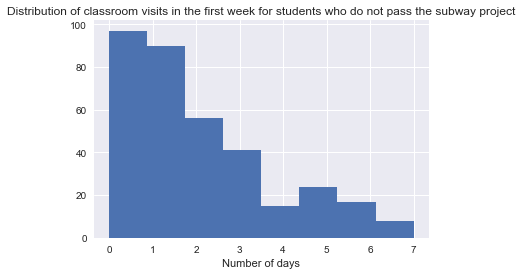

In [28]:
######################################
#                 14                 #
######################################
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。